In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Activation,Add,Dense,Conv1D,MaxPooling1D,AveragePooling1D,Flatten,GlobalMaxPooling1D,Dropout,BatchNormalization,Input,Activation,GlobalAveragePooling1D
from keras import callbacks
from tensorflow.keras.utils import to_categorical

In [2]:
import tensorflow as tf
import keras

In [3]:
train = pd.read_csv('D:\\ML\\DL Repo\\digit-recognizer\\Data\\train.csv')
test = pd.read_csv('D:\\ML\\DL Repo\\digit-recognizer\\Data\\test.csv')

In [4]:
X = np.array(train[train.columns[1:]])
y = train['label']

In [5]:
y = to_categorical(y)

In [6]:
X.shape,y.shape

((42000, 784), (42000, 10))

In [7]:
X = X.reshape((X.shape[0],X.shape[1],1))

In [8]:
X = X/255

In [9]:
X.dtype

dtype('float64')

In [10]:
def make_model():    
    input_shape = X.shape[1:]
    num_classes = 10

    input_layer = Input(input_shape)
    #input_layer = BatchNormalization()(input_layer)


    conv1 = Conv1D(filters=64, kernel_size=3, padding="same", use_bias = False)(input_layer)
    conv1 = BatchNormalization()(conv1)
    conv1 = Activation('relu')(conv1)
    
    pool1 = MaxPooling1D(3)(conv1)
    pool1 = Dropout(0.2)(pool1)
    
    conv2 = Conv1D(filters=64, kernel_size=3, padding="same", use_bias = False)(conv1)
    conv2 = BatchNormalization()(conv2)
    conv2 = Activation('relu')(conv2)
    
    pool2 = MaxPooling1D(3)(conv2)
    pool2 = Dropout(0.2)(pool2)
    
    conv3 = Conv1D(filters=64, kernel_size=3, padding="same", use_bias = False)(conv2)
    conv3 = BatchNormalization()(conv3)
    conv3 = Activation('relu')(conv3)

    gap = MaxPooling1D(3)(conv3)
    gap = Flatten()(gap)
    gap = Dropout(0.5)(gap)

    output_layer = Dense(num_classes, activation="softmax")(gap)

    return Model(inputs=input_layer, outputs=output_layer)


model = make_model()

In [11]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
callbacks = [callbacks.ModelCheckpoint("D:\\ML\\DL Repo\\digit-recognizer\\model\\best_1D_CNN_model.h5", save_best_only=True, monitor="val_loss"),
             callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001),
             callbacks.EarlyStopping(monitor="val_loss", patience=20, verbose=1)]

In [13]:
history = model.fit(X,y,epochs=500,batch_size=128,validation_split=0.2,callbacks=callbacks)

Epoch 1/500
263/263 [==============================] - 15s 23ms/step - loss: 0.4192 - accuracy: 0.8940 - val_loss: 6.6008 - val_accuracy: 0.0913 - lr: 0.0010
Epoch 2/500
263/263 [==============================] - 6s 21ms/step - loss: 0.1915 - accuracy: 0.9436 - val_loss: 3.1039 - val_accuracy: 0.3237 - lr: 0.0010
Epoch 3/500
263/263 [==============================] - 6s 21ms/step - loss: 0.1526 - accuracy: 0.9543 - val_loss: 0.1242 - val_accuracy: 0.9635 - lr: 0.0010
Epoch 4/500
263/263 [==============================] - 6s 21ms/step - loss: 0.1222 - accuracy: 0.9632 - val_loss: 0.1336 - val_accuracy: 0.9619 - lr: 0.0010
Epoch 5/500
263/263 [==============================] - 6s 21ms/step - loss: 0.1068 - accuracy: 0.9663 - val_loss: 0.1085 - val_accuracy: 0.9685 - lr: 0.0010
Epoch 6/500
263/263 [==============================] - 6s 21ms/step - loss: 0.0948 - accuracy: 0.9697 - val_loss: 0.1417 - val_accuracy: 0.9583 - lr: 0.0010
Epoch 7/500
263/263 [==============================] - 6s

In [14]:
model = keras.models.load_model('D:\\ML\\DL Repo\\digit-recognizer\\model\\best_1D_CNN_model.h5')

In [15]:
X_test = np.array(test).reshape((test.shape[0],test.shape[1],1))
X_test = X_test/255
test_y = model.predict(X_test)

In [16]:
dic = {'ImageId':[],'Label':[]}
for i in range(len(test_y)):
    dic['ImageId'].append(i+1)
    dic['Label'].append(np.argmax(test_y[i]))

In [17]:
test_df = pd.DataFrame.from_dict(dic)
test_df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,2
4,5,3


In [18]:
test_df.to_csv('D:\\ML\\DL Repo\\digit-recognizer\\Out\\my_submission_file_1D_CNN.csv', index=False)

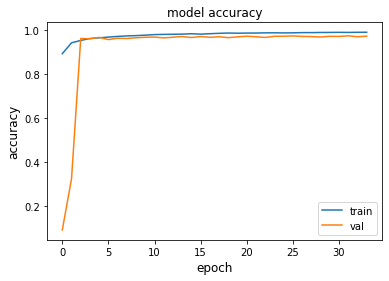

In [19]:
metric = "accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784, 1)]          0         
                                                                 
 conv1d (Conv1D)             (None, 784, 64)           192       
                                                                 
 batch_normalization (BatchN  (None, 784, 64)          256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 784, 64)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 784, 64)           12288     
                                                                 
 batch_normalization_1 (Batc  (None, 784, 64)          256       
 hNormalization)                                             

In [21]:
history_pd = pd.DataFrame(history.history)

In [22]:
history_pd.to_csv('D:\\ML\\DL Repo\\digit-recognizer\\model\\Saved training data\\1D_CNN_model_history.csv')

In [63]:
with open('D:\\ML\\DL Repo\\digit-recognizer\\model\\Saved summary\\1D_CNN_model_summary.txt','w') as f:
    f.write('```')

In [64]:
def myprint(s):
    with open('D:\\ML\\DL Repo\\digit-recognizer\\model\\Saved summary\\1D_CNN_model_summary.txt','a') as f:
        print(s, file=f)
   # with open('D:\\ML\\DL Repo\\digit-recognizer\\model\\Saved summary\\1D_CNN_model_summary.txt','a') as f:
        #f.write('```')
model.summary(print_fn = myprint)

In [65]:
with open('D:\\ML\\DL Repo\\digit-recognizer\\model\\Saved summary\\1D_CNN_model_summary.txt','a') as f:
    f.write('```')

In [70]:
history_pd['val_accuracy'].iloc[0]

0.09130952507257462